# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [43]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [44]:
# 1. Read in the dataset
df = pd.read_csv('sharktank.csv')
print("Initial data preview:")
print(df.head())

Initial data preview:
   Season  No. in series                      Company Deal           Industry  \
0     1.0            1.0             Ava the Elephant  Yes         Healthcare   
1     1.0            1.0        Mr. Tod's Pie Factory  Yes  Food and Beverage   
2     1.0            1.0                      Wispots   No  Business Services   
3     1.0            1.0  College Foxes Packing Boxes   No   Lifestyle / Home   
4     1.0            1.0                    Ionic Ear   No  Uncertain / Other   

  Entrepreneur Gender    Amount Equity  Corcoran  Cuban  Greiner  Herjavec  \
0              Female   $50,000    55%       1.0    NaN      NaN       NaN   
1                Male  $460,000    50%       1.0    NaN      NaN       NaN   
2                Male       NaN    NaN       NaN    NaN      NaN       NaN   
3                Male       NaN    NaN       NaN    NaN      NaN       NaN   
4                Male       NaN    NaN       NaN    NaN      NaN       NaN   

   John  O'Leary  Harr

There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [45]:
# Clean missing data
# df = df.fillna(0)
df.loc[:,'Corcoran':'Guest'] = df.loc[:,'Corcoran':'Guest'].fillna(0)

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [46]:
# Clean 'Amount' and 'Equity' columns: remove non-numeric characters and cast to float
df['Amount'] = df['Amount'].astype(str).str.replace('[\$,]', '', regex=True)
df['Equity'] = df['Equity'].astype(str).str.replace('[\%,]', '', regex=True)

df['Amount'] = df['Amount'].replace('', 0).astype(float)
df['Equity'] = df['Equity'].replace('', 0).astype(float)


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [47]:
# Remove companies without investment (Equity <= 0) to avoid divide-by-zero
df = df[df['Equity'] > 0].reset_index(drop=True)
df['Valuation'] = df['Amount'] / df['Equity'] * 100

# Row index of the highest valuation
idx_max_val = df['Valuation'].idxmax()

# Company with highest valuation
highest_valuation_company = df.iloc[idx_max_val]
print(highest_valuation_company)

idx_max_amount = df['Amount'].idxmax()
largest_investment_company = df.iloc[idx_max_amount]
print(largest_investment_company)

same_company = highest_valuation_company['Company'] == largest_investment_company['Company']
print("\nAre they the same company?", same_company)

Season                                                               6.0
No. in series                                                       11.0
Company                                                             Zipz
Deal                                                                 Yes
Industry                                               Food and Beverage
Entrepreneur Gender                                                 Male
Amount                                                         2500000.0
Equity                                                              10.0
Corcoran                                                             0.0
Cuban                                                                0.0
Greiner                                                              0.0
Herjavec                                                             0.0
John                                                                 0.0
O'Leary                                            

`I calculated valuation using the formula Valuation = (Amount Invested) / (Equity Percentage) * 100. After cleaning the dataset, the company with the highest valuation was Zipz, which received an investment of $2,500,000 for 10 % equity, implying a total valuation of $25,000,000. The company that received the largest total investment amount was AirCar, which received $5,000,000 for 50 % equity, corresponding to a valuation of $10,000,000.`

`These two companies are not the same, indicating highest valuation does not correlate with the largest dollar investment. Valuation depends on both the investment amount and the percentage of equity given up.`

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [48]:
# Count number of sharks involved in each deal
num_sharks = df.loc[:, 'Corcoran':'Guest'].sum(axis=1) 

# Divide each shark's indicator by num_sharks to get share of investment
df.loc[:, 'Corcoran':'Guest'] = df.loc[:, 'Corcoran':'Guest'].divide(num_sharks, axis=0) 

# Multiply by the deal amount to get actual investment per shark
df.loc[:, 'Corcoran':'Guest'] = df.loc[:, 'Corcoran':'Guest'].multiply(df['Amount'], axis=0)

# Sum investments by shark over all rows
shark_totals = df.loc[:, 'Corcoran':'Guest'].sum().sort_values(ascending=False)
print(shark_totals)

top_shark = shark_totals.idxmax()
top_amount = shark_totals.max()

print(f"\nThe shark who invested the most is {top_shark}, with a total of ${top_amount:,.2f}.")

Cuban         17742500.0
Herjavec      16110000.0
Greiner        8132500.0
John           8116500.0
O'Leary        7365000.0
Corcoran       4912500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

The shark who invested the most is Cuban, with a total of $17,742,500.00.


Over the six seasons, the total amount invested by each shark was calculated by dividing the total investment of each deal by the number of sharks involved, and then summing the amounts across all deals.
The shark who invested the most total money was Cuban, with a total investment of $17,742,500.00.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Industry
Fitness / Sports         57.5
Healthcare               55.6
Green/CleanTech          55.6
Media / Entertainment    54.5
Food and Beverage        53.8
Lifestyle / Home         52.9
Children / Education     52.7
Consumer Products        52.6
Fashion / Beauty         46.2
Software / Tech          45.5
Pet Products             41.2
Uncertain / Other        38.5
Business Services        23.1
dtype: float64


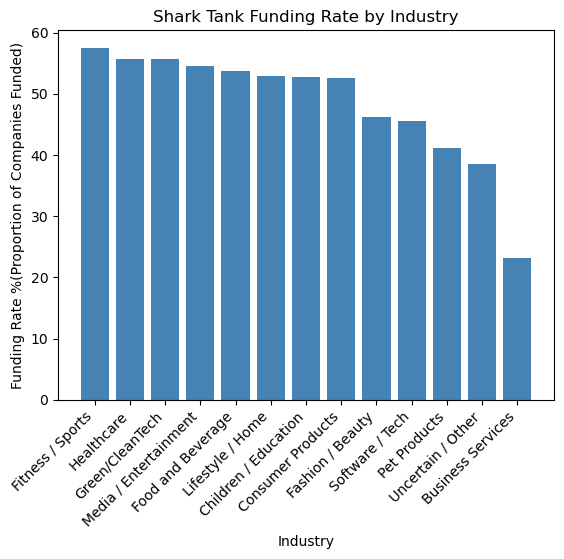

In [49]:
import matplotlib.pyplot as plt

# Make a copy of the original dataset (with unfunded companies included!)
# df_all = pd.read_csv('sharktank.csv').fillna(0)

# # Clean Equity column
# df_all['Equity'] = df_all['Equity'].astype(str).str.replace('[\%,]', '', regex=True)
# df_all['Equity'] = df_all['Equity'].replace('', 0).astype(float)

# # Add "Funded" column: 1 if Equity > 0, else 0
# df_all['Funded'] = (df_all['Equity'] > 0).astype(int)

# # Group by Industry to compute funding rate
# funding_rate = df_all.groupby('Industry')['Funded'].mean().sort_values(ascending=False)

df = pd.read_csv("sharktank.csv")

# use Deal index to find funded
funded = df[df['Deal'].str.lower() == 'yes'].groupby('Industry').size()
total = df.groupby('Industry').size()
funding_rate = (funded / total * 100).round(1)
funding_rate_sorted = funding_rate.sort_values(ascending=False)

print(funding_rate_sorted)

# Plot funding rate by industry
# funding_rate.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')

plt.title("Shark Tank Funding Rate by Industry")
plt.bar(funding_rate_sorted.index, funding_rate_sorted.values, color='steelblue')
plt.ylabel("Funding Rate %(Proportion of Companies Funded)")
plt.xlabel("Industry")
plt.xticks(rotation=45, ha='right')
# plt.ylim(0,1)  # since funding rate is a proportion between 0 and 1
plt.show()

The funding rate for each industry was calculated by dividing the number of companies that received investment (i.e., those with Equity > 0) by the total number of companies that pitched in that industry. This gives us the proportion of companies funded within each category.

The results show that the sharks tended to favor certain industries more than others. Fitness / Sports had the highest funding rate at 57.5 %, followed by Healthcare and Green/CleanTech, both at 55.6 %. Other industries with relatively high funding rates included Media / Entertainment (54.5 %), Children / Education (52.7 %), and Consumer Products (52.6 %).

On the other hand, industries like Business Services had the lowest funding rate at 23.1 %, indicating that companies in this category were much less likely to receive investment.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.